In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error

In [3]:
cars_data=pd.read_csv('E:\\NPTEL project\\car price prediction\\cars_sampled.csv')

In [4]:
data=cars_data.copy()
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
data.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [7]:
data.describe()
pd.set_option('display.float_format',lambda x: '%.3f' %x)
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
#dropping unwanted columns
col=['name','dateCrawled','lastSeen','dateCreated','postalCode']
data=data.drop(columns=col,axis=1)

In [9]:
#removing duplicates
data.drop_duplicates(keep='first',inplace=True)


In [10]:
#seeing cars with respect to year of registration
sum(data['yearOfRegistration']>2018)


26

In [11]:
sum(data['yearOfRegistration']<1950)

38

In [12]:
price_pred=data['price'].value_counts().sort_index()
print(price_pred)

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64


In [13]:
sum(data['price']>150000)

34

In [14]:
sum(data['price']<100)

1748

In [15]:
power_pred=data['powerPS'].value_counts().sort_index()
print(power_pred)

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64


<AxesSubplot:ylabel='powerPS'>

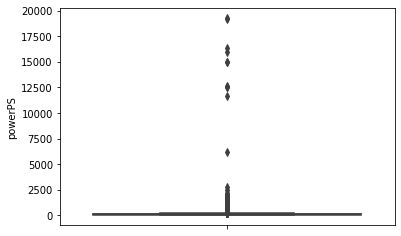

In [16]:
sns.boxplot(y=data['powerPS'])

In [17]:
sum(data['powerPS']>500)

115

In [18]:
sum(data['powerPS']<10)

5565

In [19]:
#dropping the values that are out of given range
data=data[(data.price>100) & (data.price<150000) & (data.powerPS>10) & (data.powerPS<500) & (data.yearOfRegistration>1950) & (data.yearOfRegistration<2018)]
data.shape

(42285, 14)

In [20]:
data['monthOfRegistration']/=12
data['age']=(2018-data['yearOfRegistration'])+data['monthOfRegistration']
data['age']=round(data['age'],2)
data.age

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
49991   14.670
49992   20.750
49993   19.670
49995   17.250
50000   12.830
Name: age, Length: 42285, dtype: float64

In [21]:
col=['yearOfRegistration','monthOfRegistration']
data=data.drop(columns=col,axis=1)


In [22]:
data.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [23]:
data.tail()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,17.250
50000,commercial,offer,1100,test,small car,manual,38,matiz,150000,petrol,chevrolet,no,12.830


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

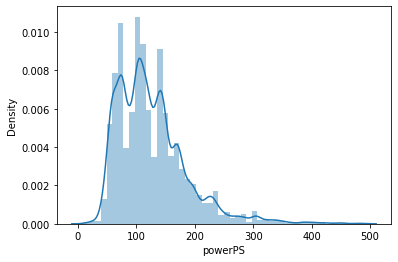

In [24]:
#visualizing the parametres
sns.distplot(data['powerPS'])

<AxesSubplot:ylabel='powerPS'>

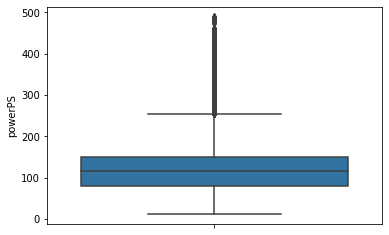

In [25]:
sns.boxplot(y=data['powerPS'])

In [26]:
#dropping outliers in power
sum(data['powerPS']>400)


132

In [27]:
data=data[(data.powerPS>10) & (data.powerPS)<400]

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

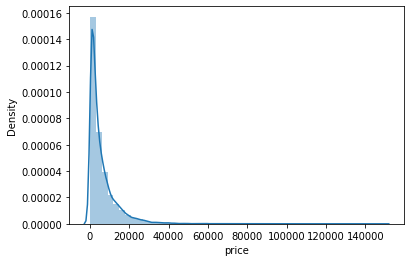

In [28]:
sns.distplot(data['price'])

<AxesSubplot:ylabel='price'>

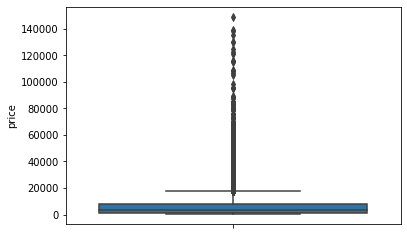

In [29]:
sns.boxplot(y=data['price'])

In [30]:
sum(data['price']>80000)

34

In [31]:
data=data[(data.price>100) & (data.price<80000)]

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

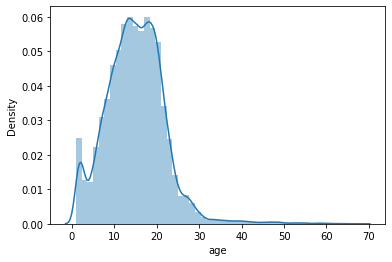

In [32]:
sns.distplot(data['age'])

<AxesSubplot:ylabel='age'>

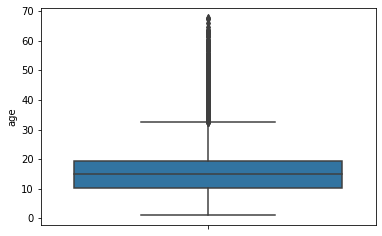

In [33]:
sns.boxplot(y=data['age'])

In [34]:
sum(data['age']>60)
data=data[(data.age>0) & (data.age<=60)]

In [35]:
data.shape

(42231, 13)

<AxesSubplot:xlabel='age', ylabel='price'>

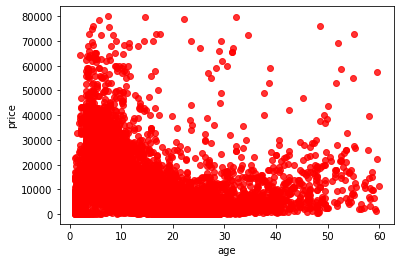

In [36]:
# visualizing thorough two columns
sns.regplot(x=data['age'],y=data['price'],scatter=True,fit_reg=False,color='Red')

<AxesSubplot:xlabel='count', ylabel='age'>

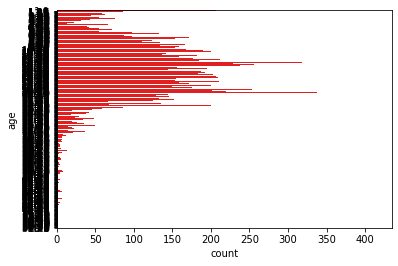

In [37]:
sns.countplot(y=data['age'],color='Red')

<AxesSubplot:xlabel='powerPS', ylabel='price'>

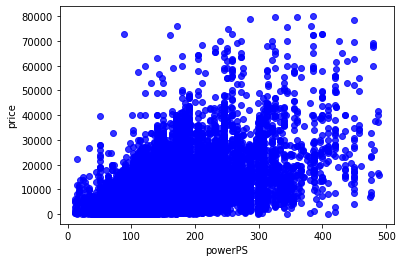

In [38]:
sns.regplot(x=data['powerPS'],y=data['price'],scatter=True,fit_reg=False,color='blue')

In [39]:
data.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [40]:
a=data.groupby("seller")["gearbox"].count()
print(a)


seller
commercial        1
private       41469
Name: gearbox, dtype: int64


In [41]:
pd.crosstab(data['gearbox'],columns=data['seller'])

seller,commercial,private
gearbox,,
automatic,0,9321
manual,1,32148


<AxesSubplot:xlabel='seller', ylabel='count'>

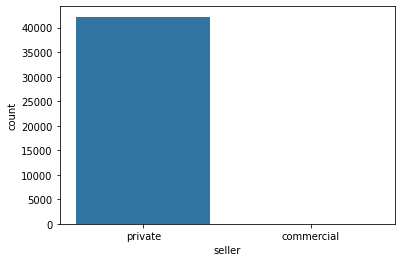

In [42]:
# lookin into seller
pd.crosstab(data['seller'],columns='count')
sns.countplot(x=data['seller'])

<AxesSubplot:xlabel='gearbox', ylabel='count'>

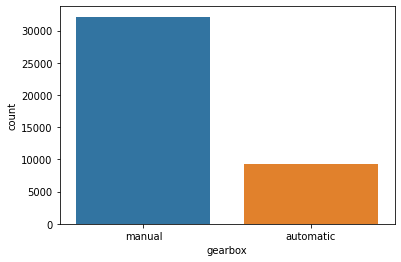

In [43]:
#looking into gearbox
pd.crosstab(data['gearbox'],columns='count')
sns.countplot(x=data['gearbox'])

<AxesSubplot:xlabel='abtest', ylabel='count'>

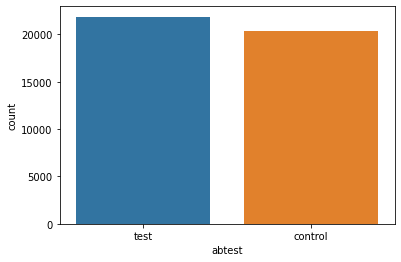

In [44]:
# looking at abtest
pd.crosstab(data['abtest'],columns='count')
sns.countplot(x=data['abtest'])

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

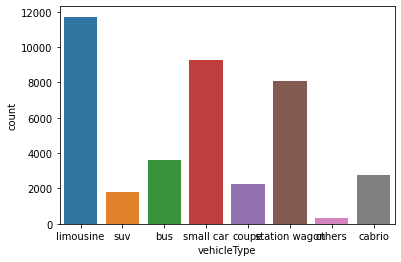

In [45]:
pd.crosstab(data['vehicleType'],columns='count')
sns.countplot(x=data['vehicleType'])

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

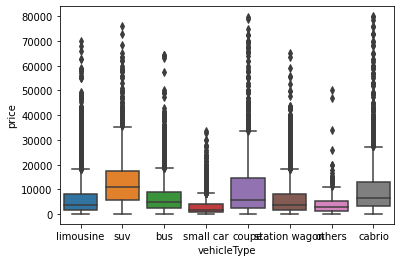

In [46]:
sns.boxplot(x=data['vehicleType'],y=data['price'])
# it affects with price so it is considered

<AxesSubplot:xlabel='abtest', ylabel='price'>

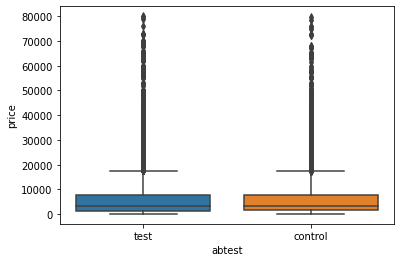

In [47]:
# using box plot comparing two columns
pd.crosstab(data['abtest'],columns='price')
sns.boxplot(x=data['abtest'],y=data['price'])
# it is not affecting as it shows similar results, so it will not be considered

In [48]:
data.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


<AxesSubplot:xlabel='gearbox', ylabel='price'>

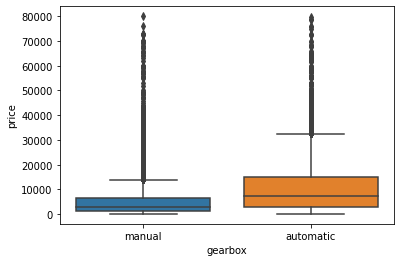

In [49]:
sns.boxplot(x=data['gearbox'],y=data['price'])
#it shows difference so it affects and will be considered

<AxesSubplot:xlabel='fuelType', ylabel='price'>

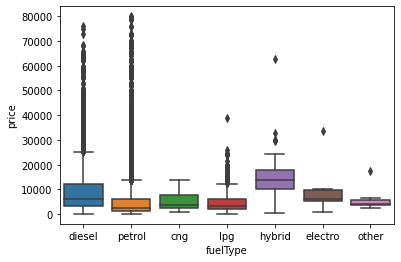

In [50]:
sns.boxplot(x=data['fuelType'],y=data['price'])
# it shows different price for different types so it can be considered

In [51]:
data.drop(data.index[data['fuelType'] == 'other'], inplace = True)

In [52]:
data.value_counts('fuelType')

fuelType
petrol     26218
diesel     12786
lpg          685
cng           70
hybrid        36
electro       10
dtype: int64

<AxesSubplot:xlabel='kilometer', ylabel='price'>

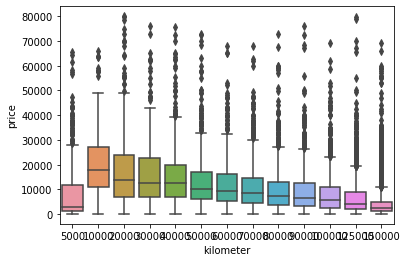

In [53]:
#checking kilometres
pd.crosstab(data['kilometer'],columns='count')
sns.boxplot(x=data['kilometer'],y=data['price'])
#it affects the price so will be considered

<AxesSubplot:xlabel='brand', ylabel='price'>

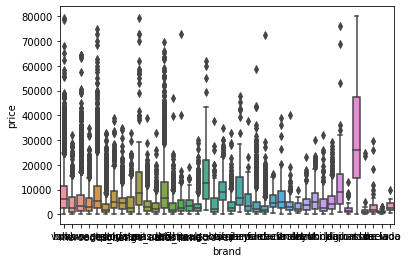

In [54]:
pd.crosstab(data['brand'],columns='count')
sns.boxplot(x=data['brand'],y=data['price'])
#it is affecting the price so itll be considered

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

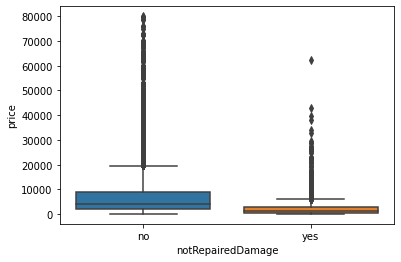

In [55]:
pd.crosstab(data['notRepairedDamage'],columns='count')
sns.boxplot(x=data['notRepairedDamage'],y=data['price'])
# it affects the price so will be considered

In [56]:
# removing insignificant columns
col=['seller','abtest','offerType']
data=data.drop(columns=col,axis=1)

<AxesSubplot:xlabel='price', ylabel='model'>

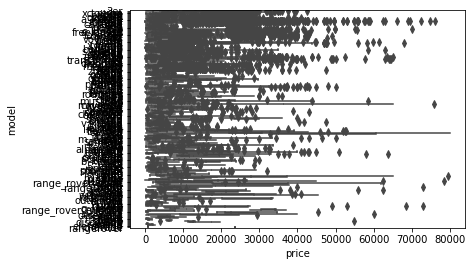

In [57]:
pd.crosstab(data['model'],columns='count')
sns.boxplot(x=data['price'],y=data['model'])

In [58]:
data.shape

(42225, 10)

In [59]:
data_select1=data.select_dtypes(exclude='object')
data_select1.corr()

,price,powerPS,kilometer,age
price,1.000,0.580,-0.456,-0.391
powerPS,0.580,1.000,-0.007,-0.160
kilometer,-0.456,-0.007,1.000,0.308
age,-0.391,-0.160,0.308,1.000


In [60]:
# Model building and predicting using linear regression and random forest
# remove all the null values
data_copy=data.dropna(axis=0)
data_copy.shape

(32800, 10)

In [61]:
data_dummies=pd.get_dummies(data_copy,drop_first=True)
data_dummies.head()

,price,powerPS,kilometer,age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.920,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x=data_dummies.drop('price',axis=1)
x.head()

,powerPS,kilometer,age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,163,150000,13.500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,86,60000,13.000,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,185,150000,10.920,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,90,150000,23.170,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,136,150000,21.920,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y=data_dummies['price']
y.head()

1    13299
3     4500
4    18750
5      988
7     1399
Name: price, dtype: int64

array([[<AxesSubplot:title={'center':'1.before'}>,
        <AxesSubplot:title={'center':'2:after'}>]], dtype=object)

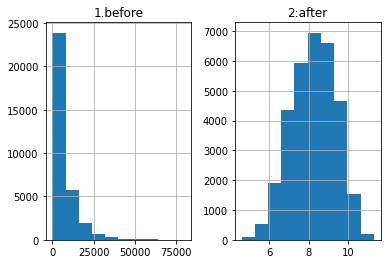

In [64]:
price=pd.DataFrame({"1.before":y,"2:after":np.log(y)})
price.hist()

In [65]:
y=np.log(y)
y.head()


1   9.495
3   8.412
4   9.839
5   6.896
7   7.244
Name: price, dtype: float64

In [66]:
# assigning values to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(22960, 299) (9840, 299) (22960,) (9840,)


In [67]:
# calculating rmse value
base_predict=np.mean(y_test)
print(base_predict)

8.24319494648158


In [68]:
# calculating mean for every value
base_predict=np.repeat(base_predict,len(y_test))
print(base_predict)

[8.24319495 8.24319495 8.24319495 ... 8.24319495 8.24319495 8.24319495]


In [69]:
# finding rmse value
base_predict_rsme=np.sqrt(mean_squared_error(y_test,base_predict))
print(base_predict_rsme)

1.1239862456873355


In [70]:
#linear regression
lgr=LinearRegression(fit_intercept=True)

In [71]:
cars12=lgr.fit(x_train,y_train)

In [72]:
cars_predict_data=lgr.predict(x_test)

In [73]:
# computing mse and rmse
lgr1_mse=mean_squared_error(y_test,cars_predict_data)
lgr1_rmse=np.sqrt(lgr1_mse)
print(lgr1_rmse)

0.5344802534561175


In [74]:
print(base_predict,cars_predict_data)

[8.24319495 8.24319495 8.24319495 ... 8.24319495 8.24319495 8.24319495] [8.35485506 8.06882554 7.64379562 ... 6.44296162 7.56346159 8.42250504]


In [75]:
# calculating r squared value
r1_line_test=cars12.score(x_test,y_test)
r1_line_train=cars12.score(x_train,y_train)
print(r1_line_test,r1_line_train)

0.7738787717266122 0.7834009272172836


<AxesSubplot:ylabel='price'>

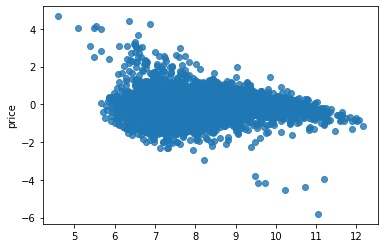

In [76]:
#plotting the difference
residual1=y_test-cars_predict_data
sns.regplot(x=cars_predict_data,y=residual1,fit_reg=False)
# most of their difference is at 0, so the prediction will be accurate

In [78]:
# predicting through random forest
rf=RandomForestRegressor(n_estimators=100,max_depth=100,min_samples_leaf=4,max_features='auto',min_samples_split=10,random_state=4)

In [79]:
rf_model=rf.fit(x_train,y_train)

c:\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [84]:
cars_predict_rf1=rf.predict(x_test)
print(cars_predict_rf1)

[8.23209575 8.2897083  7.70241436 ... 6.37778806 7.95300092 8.71972574]


In [89]:
rf1_mse=mean_squared_error(y_test,cars_predict_rf1)
rf1_rmse=np.sqrt(rf1_mse)
print(rf1_rmse)

0.4258932487553005


In [88]:
# calculating r squared value
rf1_line_test=rf_model.score(x_test,y_test)
rf1_line_train=rf_model.score(x_train,y_train)
print(rf1_line_test,rf1_line_train)

0.8564247709229427 0.9200506944209962


In [95]:
# printing the message
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r1_line_train)
print("R squared value for test from Linear Regression=  %s"% r1_line_test)
print("R squared value for train from Random Forest=  %s"% rf1_line_train)
print("R squared value for test from Random Forest=  %s"% rf1_line_test)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_predict)
print("RMSE value for test from Linear Regression=  %s"% lgr1_rmse)
print("RMSE value for test from Random Forest=  %s"% rf1_rmse)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7834009272172836
R squared value for test from Linear Regression=  0.7738787717266122
R squared value for train from Random Forest=  0.9200506944209962
R squared value for test from Random Forest=  0.8564247709229427
Base RMSE of model built from data where missing values were omitted= [8.24319495 8.24319495 8.24319495 ... 8.24319495 8.24319495 8.24319495]
RMSE value for test from Linear Regression=  0.5344802534561175
RMSE value for test from Random Forest=  0.4258932487553005
